# FINM 25000

### Review Notes - Python Helper Guide

##### 6/19/2022

Note: if you haven't watched the TA Intro to Python and Pandas, you can view it on canvas under the *Modules* section. Some items discussed here are built on concepts discussed in the intro session. 

Python provides various useful modules for data analysis, we start by importing these modules into the current working sessions

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Use of aliases such as pd, np is optional but convenient

Read excel file using the .read_excel command in pandas. Read more here: https://pandas.pydata.org/docs/reference/api/pandas.read_excel.html

In [2]:
data = pd.read_excel("multi_asset_return_data.xlsx", sheet_name='excess returns') # previous year hw data file used here
data.head()

,Date,BWX,DBC,EEM,EFA,HYG,IEF,IYR,PSP,QAI,SPY,TIP
0,2009-04-30,0.008439,-0.001554,0.155029,0.114637,0.137907,-0.028005,0.295597,0.229649,0.022329,0.098792,-0.018504
1,2009-05-31,0.054144,0.163135,0.159872,0.132390,0.029026,-0.020301,0.023199,0.054364,0.028337,0.058926,0.020438
2,2009-06-30,0.004549,-0.026858,-0.023094,-0.014648,0.032918,-0.006171,-0.025463,0.044849,-0.004036,-0.001254,0.001382
3,2009-07-31,0.031312,0.018595,0.110173,0.100442,0.069217,0.008343,0.105826,0.143274,0.015353,0.074632,0.000905
4,2009-08-31,0.007193,-0.040800,-0.013571,0.044595,-0.017404,0.007200,0.131504,0.032977,-0.004587,0.036504,0.007979


<b> Using Date as index is helpful when subsetting the columns using .loc and converting an object series to a datetime object enables more useful features

In [3]:
data = data.set_index('Date')
data.index = pd.to_datetime(data.index)
data.head()

,BWX,DBC,EEM,EFA,HYG,IEF,IYR,PSP,QAI,SPY,TIP
Date,,,,,,,,,,,
2009-04-30,0.008439,-0.001554,0.155029,0.114637,0.137907,-0.028005,0.295597,0.229649,0.022329,0.098792,-0.018504
2009-05-31,0.054144,0.163135,0.159872,0.132390,0.029026,-0.020301,0.023199,0.054364,0.028337,0.058926,0.020438
2009-06-30,0.004549,-0.026858,-0.023094,-0.014648,0.032918,-0.006171,-0.025463,0.044849,-0.004036,-0.001254,0.001382
2009-07-31,0.031312,0.018595,0.110173,0.100442,0.069217,0.008343,0.105826,0.143274,0.015353,0.074632,0.000905
2009-08-31,0.007193,-0.040800,-0.013571,0.044595,-0.017404,0.007200,0.131504,0.032977,-0.004587,0.036504,0.007979


## Q2. Part 1

To calculate the mean and volatatlity of the return series use the following two methods:

    1. Use the .mean and .std function on every column of the dataset
    2. Use the .describe method in pandas to calculate these values for all columns with a single command

In [4]:
#Method 1:

bwx_mean = data['BWX'].mean() * 12
bwx_std = data['BWX'].std() * np.sqrt(12)

print('Annualized Mean Return of BWX : {}'.format(bwx_mean))
print('Annualized Vol of BWX : {}'.format(bwx_std))
print('Annualized Sharpe of BWX : {}'.format(bwx_mean/bwx_std))
print("")

#Method 2:
performance = data.describe().loc[['mean', 'std']].transpose()
performance['Sharpe Ratio'] = performance['mean'] * np.sqrt(12)/performance['std'] 
display(performance)

Annualized Mean Return of BWX : 0.02082777222136702
Annualized Vol of BWX : 0.0746479756347593
Annualized Sharpe of BWX : 0.2790132223179635



,mean,std,Sharpe Ratio
BWX,0.001736,0.021549,0.279013
DBC,0.000770,0.051479,0.051835
EEM,0.008300,0.056705,0.507055
EFA,0.008284,0.046865,0.612318
HYG,0.006804,0.024986,0.943271
IEF,0.002687,0.016465,0.565272
IYR,0.013529,0.052287,0.896299
PSP,0.013978,0.061941,0.781710
QAI,0.002372,0.013886,0.591721
SPY,0.013549,0.040411,1.161400


## Q2. Part 2

To calculate the correlation matrix, use the .corr() method. To visualize the matrix, use the .heatmap command from seaborn package   


***** Correlation Matrix *****


,BWX,DBC,EEM,EFA,HYG,IEF,IYR,PSP,QAI,SPY,TIP
BWX,1.000000,0.439539,0.618008,0.553529,0.482635,0.233126,0.395444,0.455145,0.608363,0.375939,0.527842
DBC,0.439539,1.000000,0.626145,0.637042,0.530795,-0.384973,0.321917,0.576074,0.620032,0.575559,0.135317
EEM,0.618008,0.626145,1.000000,0.859182,0.750726,-0.305550,0.623910,0.815271,0.807201,0.765385,0.240943
EFA,0.553529,0.637042,0.859182,1.000000,0.751913,-0.379654,0.666986,0.909644,0.830789,0.874181,0.141337
HYG,0.482635,0.530795,0.750726,0.751913,1.000000,-0.237025,0.759781,0.822521,0.745498,0.747337,0.213078
IEF,0.233126,-0.384973,-0.305550,-0.379654,-0.237025,1.000000,-0.083742,-0.410875,-0.158874,-0.423448,0.645561
IYR,0.395444,0.321917,0.623910,0.666986,0.759781,-0.083742,1.000000,0.733187,0.604432,0.716514,0.279206
PSP,0.455145,0.576074,0.815271,0.909644,0.822521,-0.410875,0.733187,1.000000,0.813642,0.895402,0.129773
QAI,0.608363,0.620032,0.807201,0.830789,0.745498,-0.158874,0.604432,0.813642,1.000000,0.822311,0.347021
SPY,0.375939,0.575559,0.765385,0.874181,0.747337,-0.423448,0.716514,0.895402,0.822311,1.000000,0.101374


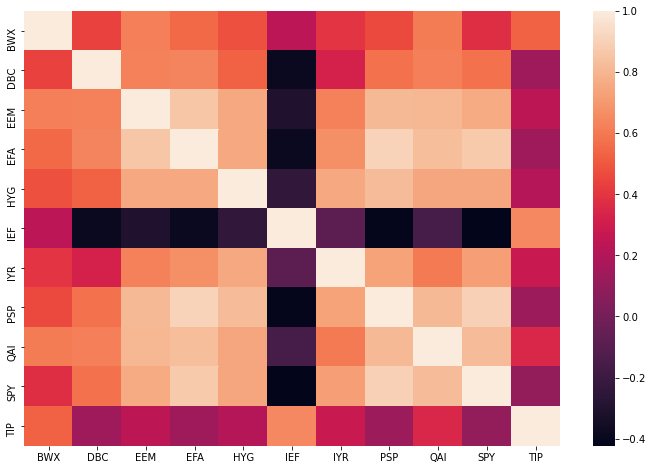

In [5]:
#Compute correaltion matrix. Remember, you don't need to annualize correlations since it is standardized by volatality

correl_matrix = data.corr()

print("")
print('***** Correlation Matrix *****')
display(correl_matrix)
print("")

#Visualize Correaltion Matrix
plt.figure(figsize = (12,8))
sns.heatmap(correl_matrix)
plt.show()

## Q2. Part 3

To calculate the tangency weights, refer to notes from lecture 1 (slide 38). We need to calculate the the covariance matrix for the returns.

In [6]:
# Compute covariance matrix. Remember to take the correct annualization factor, should be the same as the one used for the return series
cov_mat = data.cov() * 12

# To take the inverse, use the linalg sub-module within numpy
inv_cov_mat = np.linalg.inv(cov_mat)

# Calculate the return vector
mu = np.array(data.describe().loc['mean']) * 12

# Calculate the unit vector, having the same shape as the return vector
ones = np.ones(mu.shape, dtype = 'int')

<b> Apply the formula for tangency weights: </b>

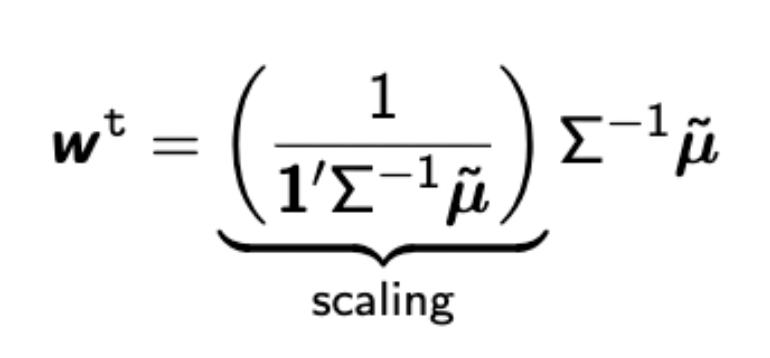

In [7]:
# Use np.dot to take the dot product of two vectors

scaling = np.dot(np.dot(ones, inv_cov_mat), mu)

numerator = np.dot(inv_cov_mat, mu)

tangency_weights = numerator/scaling

tangency_weights = pd.DataFrame(tangency_weights, index = performance.index, columns=['Tangency Weights'])

display(tangency_weights)

,Tangency Weights
BWX,-0.270153
DBC,-0.045388
EEM,0.076374
EFA,-0.162498
HYG,0.769111
IEF,1.741608
IYR,-0.359946
PSP,-0.001630
QAI,-2.429832
SPY,1.518558


## Q2. Part 4

### For Optimal Portfolio Allocation, use the following formula. You can use the numpy commands from the previous section for calculating the allocation vector 

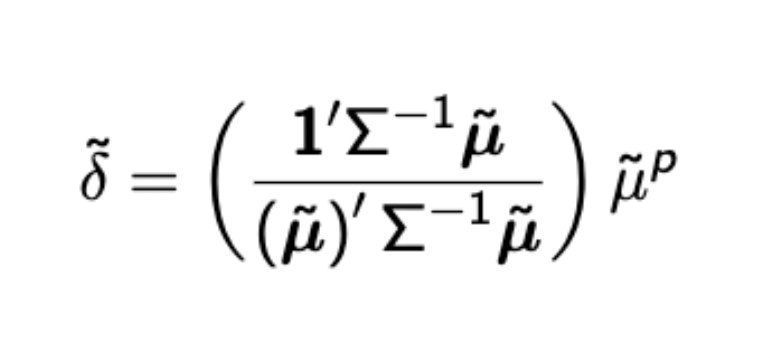

### For the portfolio variance:

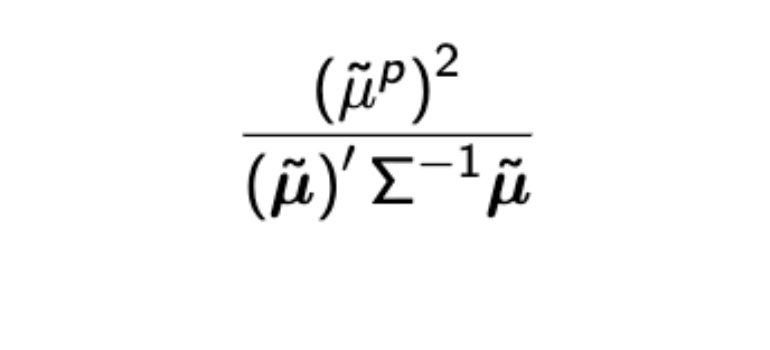

## Q2. Part 5 

An equally weighted portfolio has equal weights on every security in the selected universe

In [8]:
#Compute equal weights as 1/(number of securities)
equal_weight_vector = np.array([1/data.shape[1]] * data.shape[1])

#To scale the returns of the portfolio, take the target return (monthly 0.01, annual 0.12) and divide by the portfolio return
mean_rescaler = 0.12/np.dot(mu.transpose(), equal_weight_vector)

#Rescaled weights are simply equal weights multiplied by the rescaling factor
equal_weight_vector_rescaled = equal_weight_vector * mean_rescaler

#to check, rescaled weights produce the target portfolio return:
np.dot(mu.transpose(), equal_weight_vector_rescaled)

0.11999999999999998

A risk-parity portfolio has weights that are inversely related to the individual security vols

In [9]:
# Risk Parity Portfolio: For the Risk Averse
risk_parity_portfolio_vector = np.array(data.describe().loc['std']) * np.sqrt(12) ** -1

Use the similar approach from equally weighted portfolio to rescale the returns

## Q2. Part 6

To calculate the out-of-sample performance of the MV-optimizer, split the available dataset into in-sample dataset and out-of-sample dataset as per the instructions. Then use the MV optimization method to calculate portfolio weights on the in-sample data. Use both the in-sample and out-of-sample dataset to calculate portfolio returns and portfolio Sharpe Ratio and compare(make sure to distinguish the in-sample and out-of-sample). 

Remember that we converted the index to a datetime object. We will now use the .loc feature to easily subset our data.

In [10]:
insample_data = data.loc[:'2020']
print('*** In-sample Dataset ***')
display(insample_data)


outsample_data = data.loc['2021']

print('*** Out-of-sample Dataset ***')
display(outsample_data)

*** In-sample Dataset ***


,BWX,DBC,EEM,EFA,HYG,IEF,IYR,PSP,QAI,SPY,TIP
Date,,,,,,,,,,,
2009-04-30,0.008439,-0.001554,0.155029,0.114637,0.137907,-0.028005,0.295597,0.229649,0.022329,0.098792,-0.018504
2009-05-31,0.054144,0.163135,0.159872,0.132390,0.029026,-0.020301,0.023199,0.054364,0.028337,0.058926,0.020438
2009-06-30,0.004549,-0.026858,-0.023094,-0.014648,0.032918,-0.006171,-0.025463,0.044849,-0.004036,-0.001254,0.001382
2009-07-31,0.031312,0.018595,0.110173,0.100442,0.069217,0.008343,0.105826,0.143274,0.015353,0.074632,0.000905
2009-08-31,0.007193,-0.040800,-0.013571,0.044595,-0.017404,0.007200,0.131504,0.032977,-0.004587,0.036504,0.007979
...,...,...,...,...,...,...,...,...,...,...,...
2020-08-31,0.004145,0.046404,0.028911,0.047256,-0.000187,-0.009662,0.002352,0.059905,0.012674,0.069833,0.008935
2020-09-30,-0.012164,-0.035396,-0.010049,-0.020414,-0.009262,0.003332,-0.023360,-0.030326,-0.008266,-0.037389,-0.003726
2020-10-31,0.010069,-0.031511,0.013945,-0.035624,0.003916,-0.013926,-0.029301,-0.007477,-0.004635,-0.025051,-0.006883


*** Out-of-sample Dataset ***


,BWX,DBC,EEM,EFA,HYG,IEF,IYR,PSP,QAI,SPY,TIP
Date,,,,,,,,,,,
2021-01-31,-0.012398,0.033424,0.031830,-0.007722,-0.003690,-0.010831,-0.004229,0.003800,0.001343,-0.010100,0.002754
2021-02-28,-0.026867,0.101382,0.007878,0.022379,-0.002447,-0.023633,0.024273,0.045824,0.001877,0.027805,-0.016876
2021-03-31,-0.027604,-0.007082,-0.007168,0.025222,0.012246,-0.023766,0.057831,0.031742,-0.007090,0.045490,-0.002532
2021-04-30,0.017240,0.078266,0.011998,0.029524,0.006376,0.010012,0.078856,0.076499,0.005975,0.052910,0.014297
2021-05-31,0.009831,0.038526,0.016488,0.034823,0.000390,0.004249,0.010082,0.018566,0.005939,0.006566,0.010239
2021-06-30,-0.014417,0.024918,0.011516,-0.002197,0.012508,0.008351,0.032997,-0.000287,0.004842,0.022536,0.005579


## Some other useful functions for the extensions (Optional)

#### Q3.Part 4 asks to drop a column from the entire dataset. You can use the .drop method in pandas to drop a specific column. This will save a lot of time if the dataset has a lot of columns

In [11]:
data_dropped = data.drop('BWX', axis = 1)
data_dropped.head()

,DBC,EEM,EFA,HYG,IEF,IYR,PSP,QAI,SPY,TIP
Date,,,,,,,,,,
2009-04-30,-0.001554,0.155029,0.114637,0.137907,-0.028005,0.295597,0.229649,0.022329,0.098792,-0.018504
2009-05-31,0.163135,0.159872,0.132390,0.029026,-0.020301,0.023199,0.054364,0.028337,0.058926,0.020438
2009-06-30,-0.026858,-0.023094,-0.014648,0.032918,-0.006171,-0.025463,0.044849,-0.004036,-0.001254,0.001382
2009-07-31,0.018595,0.110173,0.100442,0.069217,0.008343,0.105826,0.143274,0.015353,0.074632,0.000905
2009-08-31,-0.040800,-0.013571,0.044595,-0.017404,0.007200,0.131504,0.032977,-0.004587,0.036504,0.007979


#### Q4 ask to calculate a diagonalized covariance matrix. A diagonalized covariance matrix has only diagonal values, all the other values in the upper and lower triangles is zero

In [12]:
## Use the np.diag method to covert an array to a diagonal matrix

cov_diag_mat = np.diag(np.diag(cov_mat))
print(np.round(cov_diag_mat, 3))

[[0.006 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.   ]
 [0.    0.032 0.    0.    0.    0.    0.    0.    0.    0.    0.   ]
 [0.    0.    0.039 0.    0.    0.    0.    0.    0.    0.    0.   ]
 [0.    0.    0.    0.026 0.    0.    0.    0.    0.    0.    0.   ]
 [0.    0.    0.    0.    0.007 0.    0.    0.    0.    0.    0.   ]
 [0.    0.    0.    0.    0.    0.003 0.    0.    0.    0.    0.   ]
 [0.    0.    0.    0.    0.    0.    0.033 0.    0.    0.    0.   ]
 [0.    0.    0.    0.    0.    0.    0.    0.046 0.    0.    0.   ]
 [0.    0.    0.    0.    0.    0.    0.    0.    0.002 0.    0.   ]
 [0.    0.    0.    0.    0.    0.    0.    0.    0.    0.02  0.   ]
 [0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.002]]
